
# Parameter Anomaly model



##  Parameter Anomaly Process (Main)
- Load Data
- Encode parameters (convert into numerical data).
- Generate matrix (each encoded parameter matrix).
- Analysis each parameter matrix values and match anomlaies. 

In [3]:
from matrix import *
from matrix import log_vectors, vocabulary_generate, tokens_generate, token_dict, split_vectors, map_vectors, integrate_lines, delete_repeated_line,log_vectors, str_array, training_data_generate, LSTM_model, mean_squared_error_modified, anomaly_report

log_file = 'RtpDump'
log_value_vector_filename = f'data/{log_file}.log_value_vector.csv'
log_value_vector_csv_fd = pd.read_csv(log_value_vector_filename)
log_value_vector_csv_fd['EventTemplate'] = log_value_vector_csv_fd['log key']
log_value_vector_csv_fd

,log message,log key,parameter value vector,EventTemplate
0,3 18 16:34:25 Cluster observer forked - pid = ...,"Cluster observer forked - pid = <*>""","[0, '1386']","Cluster observer forked - pid = <*>"""
1,3 18 16:34:25 Initialization successful. Start...,Initialization successful. Starting now the su...,[0],Initialization successful. Starting now the su...
2,3 18 16:34:25 SNM Cluster observer starting (P...,"SNM Cluster observer starting (PID <*>)...""","[0, '1386']","SNM Cluster observer starting (PID <*>)..."""
3,3 18 16:34:25 We have 1 configured nodes in th...,"We have <*> configured nodes in the cluster""","[0, '1']","We have <*> configured nodes in the cluster"""
4,"3 18 16:34:25 Cluster node 1 is UP""","Cluster node <*> is UP""","[0, '1']","Cluster node <*> is UP"""
...,...,...,...,...
1274307,3 22 07:54:58 CLM_CSCF Statistics: Role=S: tr...,"CLM_CSCF Statistics: Role=S: transit_sess=<*>,...","[600, ' ', '0', 'core_sess=0""']","CLM_CSCF Statistics: Role=S: transit_sess=<*>,..."
1274308,3 22 08:04:58 CLM_CSCF Statistics: Role=S: tr...,"CLM_CSCF Statistics: Role=S: transit_sess=<*>,...","[600, ' ', '0', 'core_sess=0""']","CLM_CSCF Statistics: Role=S: transit_sess=<*>,..."
1274309,3 22 08:14:58 CLM_CSCF Statistics: Role=S: tr...,"CLM_CSCF Statistics: Role=S: transit_sess=<*>,...","[600, ' ', '0', 'core_sess=0""']","CLM_CSCF Statistics: Role=S: transit_sess=<*>,..."
1274310,3 22 08:24:58 CLM_CSCF Statistics: Role=S: tr...,"CLM_CSCF Statistics: Role=S: transit_sess=<*>,...","[600, ' ', '0', 'core_sess=0""']","CLM_CSCF Statistics: Role=S: transit_sess=<*>,..."


#### Step1:  Key Generation {log key: Parameters}

In [9]:
%time key_num_para_dict = log_vectors(log_value_vector_csv_fd, 'temp/1_key_num_para_dict.csv')
#key_num_para_dict

the num para dict is: {'The Trace Reader for <*> tracing was successfully initialized and is fully functional."': array(["[0, 'asynchronous']", "[0, 'synchronous']", "[0, 'asynchronous']",
       "[0, 'synchronous']", "[0, 'asynchronous']", "[0, 'synchronous']",
       "[0, 'asynchronous']", "[0, 'synchronous']", "[0, 'asynchronous']",
       "[0, 'synchronous']", "[0, 'asynchronous']", "[0, 'synchronous']",
       "[0, 'asynchronous']", "[0, 'synchronous']", "[0, 'asynchronous']",
       "[0, 'synchronous']", "[0, 'asynchronous']", "[0, 'synchronous']",
       "[0, 'asynchronous']", "[0, 'synchronous']", "[0, 'asynchronous']",
       "[0, 'synchronous']", "[0, 'asynchronous']", "[0, 'synchronous']"],
      dtype=object), 'Process <*> detached from the platform"': array(["[0, 'RtpSendEvent64']", "[0, 'IMS_ICMTEST_LOCAL01']",
       "[0, 'IMS_ICMTEST_LOCAL01']", "[0, 'RtpSendEvent64']",
       "[0, 'IMS_ICMTEST_LOCAL01']", "[0, 'IMS_ICMTEST_LOCAL01']",
       "[0, 'IMS_ICMTEST_LOCAL01']

CPU times: total: 57.6 s
Wall time: 59 s


#### Step2: Learn VOOCAB

In [10]:
%time key_para_dict, fd_id = vocabulary_generate(log_value_vector_csv_fd, r'temp/2_key_num_para_dict.csv', r'temp/3_key_num_para_dict_index.csv')

the length of log_key_sequence is: 52
234        [17, 'down']
235           [0, 'up']
12234      [17, 'down']
12235         [0, 'up']
196926     [17, 'down']
196927        [0, 'up']
229928     [17, 'down']
229929        [0, 'up']
426002     [17, 'down']
426003        [0, 'up']
452002     [17, 'down']
452003        [0, 'up']
617695     [17, 'down']
617696        [0, 'up']
664694     [17, 'down']
664695        [0, 'up']
852774     [17, 'down']
852775        [0, 'up']
873774     [17, 'down']
873775        [0, 'up']
1049468    [17, 'down']
1049469       [0, 'up']
1086467    [17, 'down']
1086468       [0, 'up']
Name: parameter value vector, dtype: object
25         [0]
12025      [0]
196717     [0]
229719     [0]
425793     [0]
451793     [0]
617486     [0]
664485     [0]
852565     [0]
873565     [0]
1049259    [0]
1086258    [0]
Name: parameter value vector, dtype: object
42         [0]
12042      [0]
196734     [0]
229736     [0]
425810     [0]
451810     [0]
617503     [0]
664502     [0

29         [0]
49         [0]
51         [0]
61         [0]
62         [0]
          ... 
1086309    [0]
1086310    [0]
1086315    [0]
1086319    [0]
1086323    [0]
Name: parameter value vector, Length: 168, dtype: object
159        [0]
12159      [0]
196851     [0]
229853     [0]
425927     [0]
451927     [0]
617620     [0]
664619     [0]
852699     [0]
873699     [0]
1049393    [0]
1086392    [0]
Name: parameter value vector, dtype: object
103        [0]
108        [0]
112        [0]
113        [0]
118        [0]
          ... 
1263913    [0]
1273849    [0]
1273998    [0]
1274147    [0]
1274299    [0]
Name: parameter value vector, Length: 348, dtype: object
140        [0]
12140      [0]
196832     [0]
229834     [0]
425908     [0]
451908     [0]
617601     [0]
664600     [0]
852680     [0]
873680     [0]
1049374    [0]
1086373    [0]
Name: parameter value vector, dtype: object
8          [0]
12008      [0]
196700     [0]
229702     [0]
425776     [0]
451776     [0]
617469     [0]
664

72         [0]
74         [0]
83         [0]
12072      [0]
12074      [0]
12083      [0]
196764     [0]
196766     [0]
196775     [0]
229766     [0]
229768     [0]
229777     [0]
425840     [0]
425842     [0]
425851     [0]
451840     [0]
451842     [0]
451851     [0]
617533     [0]
617535     [0]
617544     [0]
664532     [0]
664534     [0]
664543     [0]
852612     [0]
852614     [0]
852623     [0]
873612     [0]
873614     [0]
873623     [0]
1049306    [0]
1049308    [0]
1049317    [0]
1086305    [0]
1086307    [0]
1086316    [0]
Name: parameter value vector, dtype: object
133        [0]
12133      [0]
196825     [0]
229827     [0]
425901     [0]
451901     [0]
617594     [0]
664593     [0]
852673     [0]
873673     [0]
1049367    [0]
1086366    [0]
Name: parameter value vector, dtype: object
99         [0]
100        [0]
101        [0]
102        [0]
105        [0]
          ... 
1086403    [0]
1086404    [0]
1086405    [0]
1086406    [0]
1086407    [0]
Name: parameter value vecto

CPU times: total: 1min 39s
Wall time: 1min 39s


In [11]:
# ID: log Key
log_key_ids =dict(zip(fd_id['log key'], fd_id['EventTemplate'])) 
fd_id.drop(['EventTemplate'], inplace=True, axis=1)
trace = pd.DataFrame(log_key_ids.items(), columns=['evenID', 'log key'])
trace.to_csv('temp/key_trace_dict.csv')

fd_id.head()
#key_para_dict

,log message,log key,parameter value vector
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"[0, '1386']"
1,3 18 16:34:25 Initialization successful. Start...,E50,[0]
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"[0, '1386']"
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"[0, '1']"
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"[0, '1']"


#### Step3: 
#### A) Extract Unique Parameters list

In [12]:
# module to process the exception in template computation
%time tokens = tokens_generate(key_para_dict)

CPU times: total: 16.4 s
Wall time: 16.4 s


#### B) Encode Each Unique Parameters from VOOCAB

In [13]:
%time tokens_encode_dict = token_dict(tokens, 'temp/4_tokenized_numerical_param.pkl')

CPU times: total: 109 ms
Wall time: 101 ms


In [14]:
#tokens_encode_dict
#tokens

#### Step 4: 
#### A) Splits Parameters into columns

In [15]:
# split the parameter value vector into different columns
%time fd_id, list_name_cols = split_vectors(fd_id, 'temp/5_splitted_cols.csv')

CPU times: total: 16min 31s
Wall time: 16min 34s


In [16]:
fd_id

,log message,log key,parameter value vector,value0,value1,value2,value3,value4,value5,value6
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"[0, '1386']",0,1386,None,None,None,None,None
1,3 18 16:34:25 Initialization successful. Start...,E50,[0],0,None,None,None,None,None,None
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"[0, '1386']",0,1386,None,None,None,None,None
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"[0, '1']",0,1,None,None,None,None,None
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"[0, '1']",0,1,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1274307,3 22 07:54:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,,0,"core_sess=0""",None,None,None
1274308,3 22 08:04:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,,0,"core_sess=0""",None,None,None
1274309,3 22 08:14:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,,0,"core_sess=0""",None,None,None
1274310,3 22 08:24:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,,0,"core_sess=0""",None,None,None


#### B) Encode each seprated cols

In [17]:
%time fd_value =map_vectors(fd_id, list_name_cols, 'temp/6_encoded_splitted_cols.csv', tokens_encode_dict)
fd_value

CPU times: total: 33.4 s
Wall time: 35.1 s


,log message,log key,parameter value vector,value0,value1,value2,value3,value4,value5,value6
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"[0, '1386']",0,[120],NaN,NaN,NaN,NaN,NaN
1,3 18 16:34:25 Initialization successful. Start...,E50,[0],0,NaN,NaN,NaN,NaN,NaN,NaN
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"[0, '1386']",0,[120],NaN,NaN,NaN,NaN,NaN
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"[0, '1']",0,[136],NaN,NaN,NaN,NaN,NaN
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"[0, '1']",0,[136],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1274307,3 22 07:54:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,NaN,[13],"[1, 2, 13]",NaN,NaN,NaN
1274308,3 22 08:04:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,NaN,[13],"[1, 2, 13]",NaN,NaN,NaN
1274309,3 22 08:14:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,NaN,[13],"[1, 2, 13]",NaN,NaN,NaN
1274310,3 22 08:24:58 CLM_CSCF Statistics: Role=S: tr...,E34,"[600, ' ', '0', 'core_sess=0""']",600,NaN,[13],"[1, 2, 13]",NaN,NaN,NaN


#### C) Merge Back into One

In [18]:
# integrate the vector lines into one
%time integrated_fd_value = integrate_lines(fd_value, list_name_cols)
integrated_fd_value

CPU times: total: 5min 22s
Wall time: 5min 24s


,log message,log key,ColumnX
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"0,[120]"
1,3 18 16:34:25 Initialization successful. Start...,E50,0
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"0,[120]"
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"0,[136]"
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"0,[136]"
...,...,...,...
1274307,3 22 07:54:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274308,3 22 08:04:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274309,3 22 08:14:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274310,3 22 08:24:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"


#### D) Delete Duplicates

In [19]:
# delete repeated column in the csv
%time Encoded_df =delete_repeated_line(integrated_fd_value, 'temp/encoded_log_value_vector.csv')
Encoded_df

CPU times: total: 15.6 s
Wall time: 15.6 s


,log message,log key,parameter value vector
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"0,[120]"
1,3 18 16:34:25 Initialization successful. Start...,E50,0
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"0,[120]"
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"0,[136]"
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"0,[136]"
...,...,...,...
1274307,3 22 07:54:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274308,3 22 08:04:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274309,3 22 08:14:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"
1274310,3 22 08:24:58 CLM_CSCF Statistics: Role=S: tr...,E34,"600,[13],[1, 2, 13]"


### Matrix Generation


In [2]:
%time fd_parameter = pd.read_csv(r'temp/encoded_log_value_vector.csv')
fd_parameter = fd_parameter.copy()
fd_parameter.head()

CPU times: total: 2.16 s
Wall time: 2.17 s


,log message,log key,parameter value vector
0,3 18 16:34:25 Cluster observer forked - pid = ...,E42,"0,[120]"
1,3 18 16:34:25 Initialization successful. Start...,E50,0
2,3 18 16:34:25 SNM Cluster observer starting (P...,E48,"0,[120]"
3,3 18 16:34:25 We have 1 configured nodes in th...,E18,"0,[136]"
4,"3 18 16:34:25 Cluster node 1 is UP""",E20,"0,[136]"


In [3]:
# create the aim file where the key_num_para_dict.csv will be saved
%time key_num_para_dict = log_vectors(fd_parameter, 'temp/7_aim_dict_para.csv') 
key_num_para_dict

the num para dict is: {'E17': array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object), 'E49': array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object), 'E31': array(['0,[7],[258]', '0,[7],[258]', '0,[7],[171]', '0,[7],[171]',
       '324,[7],[151]', '0,[7],[258]', '324,[7],[151]', '0,[7],[258]',
       '0,[7],[171]', '0,[7],[171]', '324,[7],[151]', '324,[7],[151]',
       '0,[7],[258]', '0,[7],[258]', '0,[7],[171]', '0,[7],[171]',
       '324,[7],[151]', '0,[7],[258]', '324,[7],[151]', '0,[7],[171]',
       '0,[7],[258]', '0,[7],[171]', '324,[7],[151]', '324,[7],[151]',
       '0,[7],[258]', '0,[7],[258]', '0,[7],[171]', '0,[7],[171]',
       '324,[7],[151]', '0,[7],[258]', '324,[7],[151]', '0,[7],[258]',
       '0,[7],[171]', '0,[7],[171]', '324,[7],[151]', '324,[7],[151]'],
      dtype=object), 'E50': array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object), 'E34': array(['13,[13],[1, 2, 13]

KeyboardInterrupt: 

NameError: name 'key_num_para_dict' is not defined

In [22]:
%%time
# create all the matrixes for all the eventIDs
i = 0
for key in key_num_para_dict.keys():
    print("the key is:", key)
    str_array(key_num_para_dict, key, 'temp/npy/', str(i))
    i = i+1

the key is: E38

 [[ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]
 [ 17. 247.]
 [  0. 144.]]
the key is: E25

 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
the key is: E2

 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
the key is: E26

 [[302.  87.  15.  16.   7. 176. 136.]
 [302.  87.  15.  16.   7. 176. 136.]
 [  0.  87.  15.  16.   7. 176. 258.]
 [  0.  87.  15.  16.   7. 176. 258.]
 [  0.  87.  15.  16.   7. 176. 171.]
 [  0.  87.  15.  16.   7. 176. 171.]
 [320. 196.  15.  16.   7. 207. 136.]
 [  0.  87.  15.  16.   7. 176. 148.]
 [302.  87.  15.  16.   7. 176. 136.]
 [  0.  87.  15.  16.   7. 176. 258.]
 [320. 196.  15.  16.   7. 207. 136.]
 [  0.  87.  15.  16.   7. 176. 148.]
 [302.  87.  1

the key is: E39

 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
the key is: E33

 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0


 [[  0.  78.  39.  39.]
 [  0. 174.  87.  87.]
 [  0.  79.  40.  40.]
 ...
 [  0.   4. 104. 105.]
 [  0.   4. 104. 105.]
 [  0.   4. 104. 105.]]
the key is: E3

 [[  0. 123.  11.  45.  45.  45.]
 [  0. 185.  14.  66.  66.  66.]
 [  0. 222.   5.  55.   5.  57.]
 [  0.  84. 146.  77.  77.  77.]
 [  0.  35.  58.  31.  31.  31.]
 [  0.  50.   5.   8.   5.  14.]
 [  0.   4.  12.   4.  82.  12.]
 [  0.   4.  41.   4.  33.  16.]
 [  0. 123.  11.  45.  45.  45.]
 [  0. 185.  14.  66.  66.  66.]
 [  0. 222.   5.  55.   5.  57.]
 [  0.  84. 146.  77.  77.  77.]
 [  0.  35.  58.  31.  31.  31.]
 [  0.  50.   5.   8.   5.  14.]
 [  0.   4.  12.   4.  82.  12.]
 [  0.   4.  41.   4.  33.  16.]
 [  0. 123.  11.  45.  45.  45.]
 [  0. 185.  14.  66.  66.  66.]
 [  0. 222.   5.  55.   5.  57.]
 [  0.  84. 146.  77.  77.  77.]
 [  0.  35.  58.  31.  31.  31.]
 [  0.  50.   5.   8.   5.  14.]
 [  0.   4.  12.   4.  82.  12.]
 [  0.   4.  41.   4.  33.  16.]
 [  0. 123.  11.  45.  45.  45.]
 [  0. 185. 

###  Matrix Analysis part

In [5]:
%%time
filenames = []
root_dir = 'temp/npy/'
# r=root, d = directories, f=files
if not os.path.exists(root_dir):
    os.mkdir(root_dir)
else:
    for r, d, f in os.walk(root_dir):
        for file in f:
            if file.endswith('.npy'):
                filenames.append(os.path.join(r, file))
# set the random seed
seed = 0
rmses = []
rmses_dict = {}
    
# record the anomaly logs with the name of file and the anomaly logs order
suspicious_anomaly_dict, fp_logs_dict = {}, {}

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
len(filenames)

52

we are processing matrix: temp/npy/E0.npy
the shape of X is: (21, 3, 2)
the train x is [[[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 245.]
  [  0. 182.]
  [  0. 245.]]

 [[  0. 245.]
  [  0. 182.]
  [  0. 245.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 245.]
  [  0. 182.]
  [  0. 245.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 245.]
  [  0. 182.]
  [  0. 245.]]

 [[  0. 182.]
  [  0. 245.]
  [  0. 182.]]

 [[  0. 245.]
  [  0. 182.]
  [  0. 245.]]] and its shape is (12, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 23174.2812
Epoch 2/60
1/1 - 0s - loss: 22370.9844
Epoch 3/60
1/1 - 0s - loss: 21508.3379
Epoch 4/60
1/1 - 0s - loss: 20542.1211
Epoch 5/60
1/1 - 0s - loss: 19438.1348
Epoch 6/60
1/1 - 0s - loss: 18184.8223
Epoch 7/60
1/1 - 0s - loss: 16686.2910
Epoch 8/60
1/1 - 0s - loss: 14960.9658
Epoch 9/60
1/1 - 0s - loss: 13056.9219
Epoch 

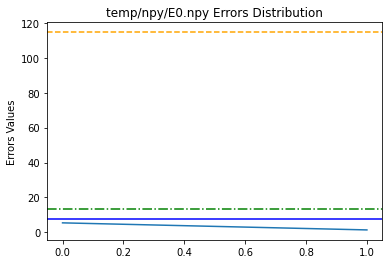

we are processing matrix: temp/npy/E1.npy
the shape of X is: (81, 3, 4)
the train x is [[[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  1.   4. 104. 105.]
  [  0.  18.   9.   9.]]

 [[  0.   4. 104. 105.]
  [  1.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.  18.   9.   9.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  1.   4. 104. 105.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  0.   4. 104. 105.]
  [  0.  18.   9.   9.]]

 [[  0.   4. 104. 105.]
 

the predicted y is: [[ 1.26730144e-01  5.99723387e+00  9.07647247e+01  9.14946213e+01]
 [-1.78515255e-01  4.07131290e+00  1.03249664e+02  1.04388069e+02]
 [ 8.45748708e-02  5.96774578e+00  9.08568268e+01  9.15308228e+01]
 [ 8.45748708e-02  5.96774578e+00  9.08568268e+01  9.15308228e+01]
 [ 1.93802059e-01  4.03303528e+00  1.03895607e+02  1.05036156e+02]
 [ 8.45748708e-02  5.96774578e+00  9.08568268e+01  9.15308228e+01]
 [-2.41096318e-01  4.06803942e+00  1.03198708e+02  1.04321663e+02]
 [-1.78515255e-01  4.07131290e+00  1.03249664e+02  1.04388069e+02]
 [ 1.26730144e-01  5.99723387e+00  9.07647247e+01  9.14946213e+01]
 [ 1.93802059e-01  4.03303528e+00  1.03895607e+02  1.05036156e+02]
 [ 1.26730144e-01  5.99723387e+00  9.07647247e+01  9.14946213e+01]
 [ 1.26730144e-01  5.99723387e+00  9.07647247e+01  9.14946213e+01]
 [ 8.45748708e-02  5.96774578e+00  9.08568268e+01  9.15308228e+01]
 [ 8.45748708e-02  5.96774578e+00  9.08568268e+01  9.15308228e+01]
 [ 2.52900302e-01  9.25539017e+00  6.35005

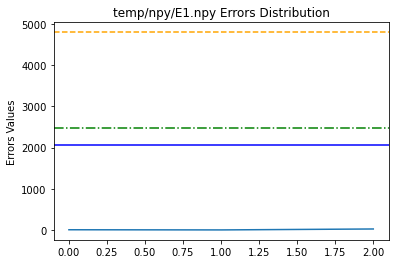

we are processing matrix: temp/npy/E10.npy
the shape of X is: (345, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]


the predicted y is: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
the d_matrix is: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

C:\Users\ashoaib\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ashoaib\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


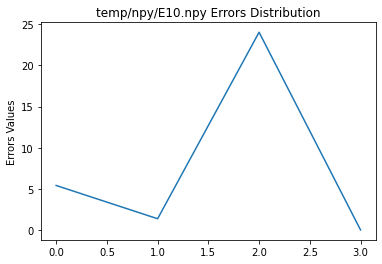

we are processing matrix: temp/npy/E11.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

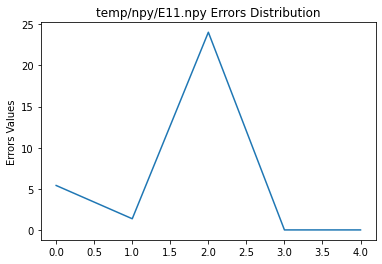

we are processing matrix: temp/npy/E12.npy
the shape of X is: (21, 3, 3)
the train x is [[[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0.  72. 164.]
  [  0. 239.  63.]
  [  0.  72. 164.]]

 [[  0.  72. 164.]
  [  0. 239.  63.]
  [  0.  72. 164.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0.  72. 164.]
  [  0. 239.  63.]
  [  0.  72. 164.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0.  72. 164.]
  [  0. 239.  63.]
  [  0.  72. 164.]]

 [[  0. 239.  63.]
  [  0.  72. 164.]
  [  0. 239.  63.]]

 [[  0.  72. 164.]
  [  0. 239.  63.]
  [  0.  72. 164.]]] and its shape is (12, 3, 3)
Epoch 1/60
1/1 - 0s - loss: 15401.3564
Epoch 2/60
1/1 - 0s - loss: 14750.7842
Epoch 3/60
1/1 - 0s - loss: 14099.4688
Epoch 4/60
1/1 - 0s - loss: 13475.1172
Epoch 5/60
1/1 - 0s 

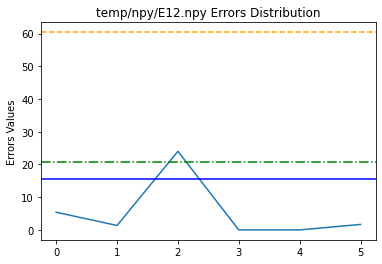

we are processing matrix: temp/npy/E13.npy
the shape of X is: (9, 3, 1)
the train x is [[[109.]
  [109.]
  [109.]]

 [[109.]
  [109.]
  [109.]]

 [[109.]
  [109.]
  [109.]]

 [[109.]
  [109.]
  [109.]]

 [[109.]
  [109.]
  [109.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 12292.5195
Epoch 2/60
1/1 - 0s - loss: 11531.5439
Epoch 3/60
1/1 - 0s - loss: 10858.0381
Epoch 4/60
1/1 - 0s - loss: 10231.2979
Epoch 5/60
1/1 - 0s - loss: 9600.8496
Epoch 6/60
1/1 - 0s - loss: 8978.1182
Epoch 7/60
1/1 - 0s - loss: 8385.6445
Epoch 8/60
1/1 - 0s - loss: 7799.1382
Epoch 9/60
1/1 - 0s - loss: 7185.9595
Epoch 10/60
1/1 - 0s - loss: 6498.9785
Epoch 11/60
1/1 - 0s - loss: 5689.2510
Epoch 12/60
1/1 - 0s - loss: 4729.1309
Epoch 13/60
1/1 - 0s - loss: 3603.6750
Epoch 14/60
1/1 - 0s - loss: 2358.4580
Epoch 15/60
1/1 - 0s - loss: 1205.3291
Epoch 16/60
1/1 - 0s - loss: 371.0776
Epoch 17/60
1/1 - 0s - loss: 5.8509
Epoch 18/60
1/1 - 0s - loss: 229.4033
Epoch 19/60
1/1 - 0s - loss: 730.1961
Epoch 20/60

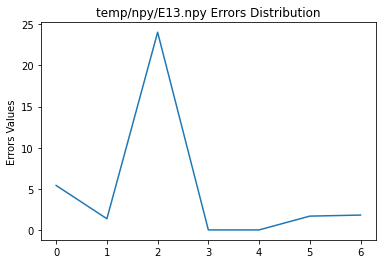

we are processing matrix: temp/npy/E14.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

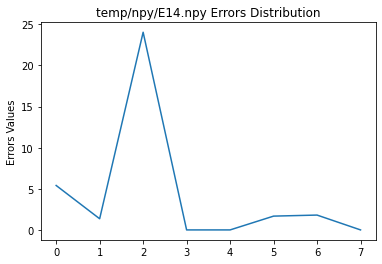

we are processing matrix: temp/npy/E15.npy
the shape of X is: (105, 3, 1)
the train x is [[[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]


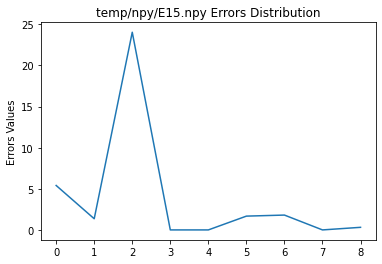

we are processing matrix: temp/npy/E16.npy
the shape of X is: (9, 3, 3)
the train x is [[[  0.   7. 151.]
  [  0.   7. 151.]
  [  0.   7. 151.]]

 [[  0.   7. 151.]
  [  0.   7. 151.]
  [  0.   7. 151.]]

 [[  0.   7. 151.]
  [  0.   7. 151.]
  [  0.   7. 151.]]

 [[  0.   7. 151.]
  [  0.   7. 151.]
  [  0.   7. 151.]]

 [[  0.   7. 151.]
  [  0.   7. 151.]
  [  0.   7. 151.]]] and its shape is (5, 3, 3)
Epoch 1/60
1/1 - 0s - loss: 7588.1079
Epoch 2/60
1/1 - 0s - loss: 7112.1343
Epoch 3/60
1/1 - 0s - loss: 6639.0391
Epoch 4/60
1/1 - 0s - loss: 6144.6147
Epoch 5/60
1/1 - 0s - loss: 5572.0874
Epoch 6/60
1/1 - 0s - loss: 4922.2065
Epoch 7/60
1/1 - 0s - loss: 4267.8843
Epoch 8/60
1/1 - 0s - loss: 3626.0215
Epoch 9/60
1/1 - 0s - loss: 2949.0925
Epoch 10/60
1/1 - 0s - loss: 2248.9463
Epoch 11/60
1/1 - 0s - loss: 1591.1984
Epoch 12/60
1/1 - 0s - loss: 1008.8042
Epoch 13/60
1/1 - 0s - loss: 522.6143
Epoch 14/60
1/1 - 0s - loss: 176.3590
Epoch 15/60
1/1 - 0s - loss: 66.9143
Epoch 16/60
1/1 - 0

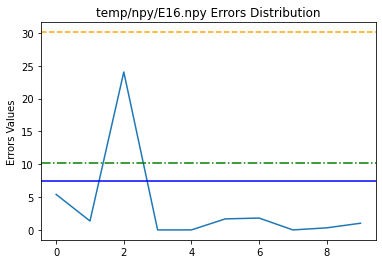

we are processing matrix: temp/npy/E17.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

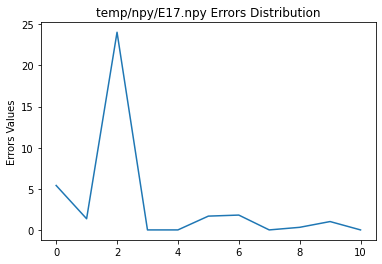

we are processing matrix: temp/npy/E18.npy
the shape of X is: (9, 3, 2)
the train x is [[[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]] and its shape is (5, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 8661.3438
Epoch 2/60
1/1 - 0s - loss: 8364.3447
Epoch 3/60
1/1 - 0s - loss: 8031.3447
Epoch 4/60
1/1 - 0s - loss: 7651.5508
Epoch 5/60
1/1 - 0s - loss: 7228.0146
Epoch 6/60
1/1 - 0s - loss: 6760.7915
Epoch 7/60
1/1 - 0s - loss: 6245.2891
Epoch 8/60
1/1 - 0s - loss: 5674.7212
Epoch 9/60
1/1 - 0s - loss: 5037.4014
Epoch 10/60
1/1 - 0s - loss: 4315.5249
Epoch 11/60
1/1 - 0s - loss: 3487.9238
Epoch 12/60
1/1 - 0s - loss: 2565.5225
Epoch 13/60
1/1 - 0s - loss: 1623.2496
Epoch 14/60
1/1 - 0s - loss: 766.1182
Epoch 15/60
1/1 - 0s - loss: 165.9044
Epoch 16/60
1/1 - 0s - loss: 21.9193
Epoch 17/60
1/1 - 0s - loss: 326.1440
Epoch 18/60
1/1 -

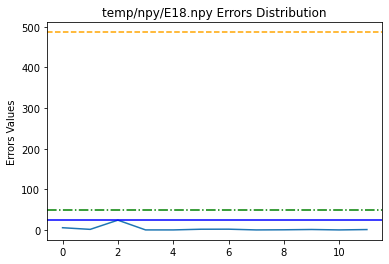

we are processing matrix: temp/npy/E19.npy
the shape of X is: (33, 3, 2)
the train x is [[[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0. 219.]
  [  0.  10.]
  [  0. 154.]]

 [[  0. 219.]
  [  0.  10.]
  [  0. 154.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0. 154.]
  [  0. 219.]
  [  0.  10.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]

 [[  0.  10.]
  [  0. 154.]
  [  0. 219.]]] and its shape is (19, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 7363.2261
Epoch 2/60

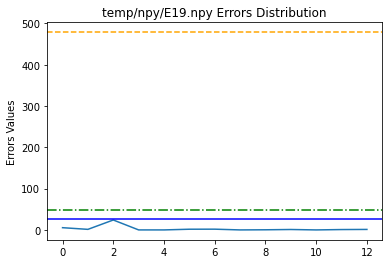

we are processing matrix: temp/npy/E2.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s 

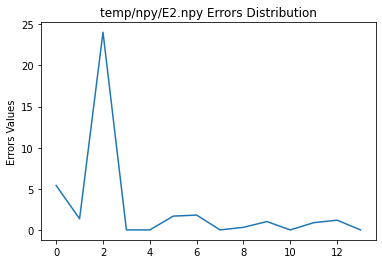

we are processing matrix: temp/npy/E20.npy
the shape of X is: (9, 3, 2)
the train x is [[[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]

 [[  0. 136.]
  [  0. 136.]
  [  0. 136.]]] and its shape is (5, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 8982.3926
Epoch 2/60
1/1 - 0s - loss: 8638.9551
Epoch 3/60
1/1 - 0s - loss: 8295.0713
Epoch 4/60
1/1 - 0s - loss: 7935.2290
Epoch 5/60
1/1 - 0s - loss: 7543.2290
Epoch 6/60
1/1 - 0s - loss: 7100.8501
Epoch 7/60
1/1 - 0s - loss: 6596.5142
Epoch 8/60
1/1 - 0s - loss: 6009.5713
Epoch 9/60
1/1 - 0s - loss: 5329.2451
Epoch 10/60
1/1 - 0s - loss: 4546.9370
Epoch 11/60
1/1 - 0s - loss: 3687.2812
Epoch 12/60
1/1 - 0s - loss: 2775.5771
Epoch 13/60
1/1 - 0s - loss: 1885.5717
Epoch 14/60
1/1 - 0s - loss: 1095.0769
Epoch 15/60
1/1 - 0s - loss: 484.0923
Epoch 16/60
1/1 - 0s - loss: 120.5795
Epoch 17/60
1/1 - 0s - loss: 86.9176
Epoch 18/60
1/1 

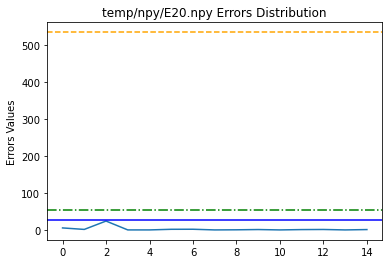

we are processing matrix: temp/npy/E21.npy
the shape of X is: (633, 3, 3)
the train x is [[[  1.   3. 249.]
  [  1.   3.  96.]
  [  0.   3.  31.]]

 [[  0.   3. 204.]
  [  0.   3. 212.]
  [  1.   3. 160.]]

 [[  1.   3. 234.]
  [  1.   3. 211.]
  [  0.   3. 112.]]

 ...

 [[  0.   3. 112.]
  [  0.   3. 195.]
  [  0.   3. 208.]]

 [[  0.   3. 134.]
  [  1.   3.  76.]
  [  7.   3. 213.]]

 [[  0.   3. 135.]
  [  1.   3. 161.]
  [  1.   3. 234.]]] and its shape is (379, 3, 3)
Epoch 1/60
12/12 - 0s - loss: 5698.4478
Epoch 2/60
12/12 - 0s - loss: 2471.4712
Epoch 3/60
12/12 - 0s - loss: 2097.1821
Epoch 4/60
12/12 - 0s - loss: 1760.4663
Epoch 5/60
12/12 - 0s - loss: 1468.6221
Epoch 6/60
12/12 - 0s - loss: 1297.9355
Epoch 7/60
12/12 - 0s - loss: 1222.5894
Epoch 8/60
12/12 - 0s - loss: 1083.1720
Epoch 9/60
12/12 - 0s - loss: 976.5908
Epoch 10/60
12/12 - 0s - loss: 954.8738
Epoch 11/60
12/12 - 0s - loss: 863.1798
Epoch 12/60
12/12 - 0s - loss: 912.0637
Epoch 13/60
12/12 - 0s - loss: 808.7872
Epo

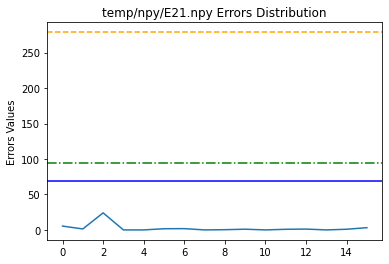

we are processing matrix: temp/npy/E22.npy
the shape of X is: (249, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]


the predicted y is: [[ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [-0.00763917]
 [ 0.06676535]
 [ 0.06676535]
 [-0.00763917]
 [ 0.06676535]
 [ 0.06676535]
 [-0.00763917]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.00027271]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.00088954]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [-0.00763917]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.00027271]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.00088954]
 [ 0.06676535]
 [ 0.06676535]
 [-0.00763917]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.00088954]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.06676535]
 [ 0.

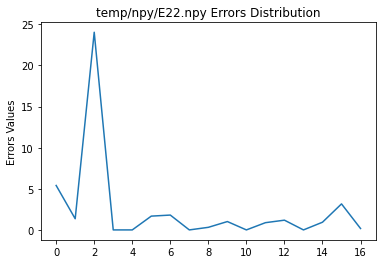

we are processing matrix: temp/npy/E23.npy
the shape of X is: (1263937, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (758362, 3, 1)
Epoch 1/60
23699/23699 - 166s - loss: 30939.0723
Epoch 2/60
23699/23699 - 166s - loss: 30850.7441
Epoch 3/60
23699/23699 - 167s - loss: 30953.9961
Epoch 4/60
23699/23699 - 166s - loss: 30891.8066
Epoch 5/60
23699/23699 - 150s - loss: 30923.5547
Epoch 6/60
23699/23699 - 149s - loss: 30836.5078
Epoch 7/60
23699/23699 - 151s - loss: 30887.5273
Epoch 8/60
23699/23699 - 152s - loss: 30846.6836
Epoch 9/60
23699/23699 - 151s - loss: 30852.0039
Epoch 10/60
23699/23699 - 152s - loss: 30886.3867
Epoch 11/60
23699/23699 - 151s - loss: 30863.5527
Epoch 12/60
23699/23699 - 151s - loss: 30839.4883
Epoch 13/60
23699/23699 - 153s - loss: 30865.9941
Epoch 14/60
23699/23699 - 151s - loss: 30846.4258
Epoch 15/60
23699/23699 - 152s - loss: 3

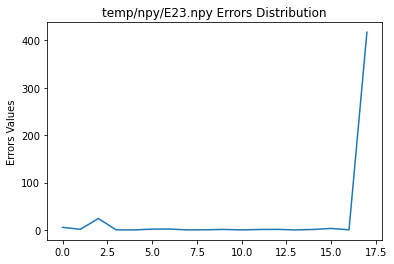

we are processing matrix: temp/npy/E24.npy
the shape of X is: (21, 3, 2)
the train x is [[[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0. 185.]
  [  0.  70.]
  [  0. 185.]]

 [[  0. 185.]
  [  0.  70.]
  [  0. 185.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0. 185.]
  [  0.  70.]
  [  0. 185.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0. 185.]
  [  0.  70.]
  [  0. 185.]]

 [[  0.  70.]
  [  0. 185.]
  [  0.  70.]]

 [[  0. 185.]
  [  0.  70.]
  [  0. 185.]]] and its shape is (12, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 11035.7510
Epoch 2/60
1/1 - 0s - loss: 10807.2295
Epoch 3/60
1/1 - 0s - loss: 10585.6084
Epoch 4/60
1/1 - 0s - loss: 10352.3467
Epoch 5/60
1/1 - 0s - loss: 10069.7373
Epoch 6/60
1/1 - 0s - loss: 9712.0498
Epoch 7/60
1/1 - 0s - loss: 9272.9258
Epoch 8/60
1/1 - 0s - loss: 8744.1104
Epoch 9/60
1/1 - 0s - loss: 8124.3071
Epoch 10/

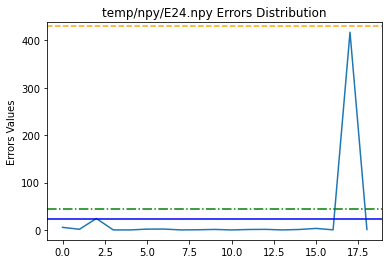

we are processing matrix: temp/npy/E25.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

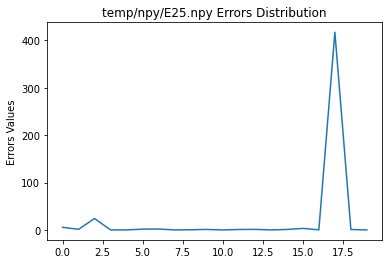

we are processing matrix: temp/npy/E26.npy
the shape of X is: (57, 3, 7)
the train x is [[[320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]
  [302.  87.  15.  16.   7. 176. 136.]]

 [[  0.  87.  15.  16.   7. 176. 171.]
  [  0.  87.  15.  16.   7. 176. 171.]
  [320. 196.  15.  16.   7. 207. 136.]]

 [[320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]
  [302.  87.  15.  16.   7. 176. 136.]]

 [[  0.  87.  15.  16.   7. 176. 171.]
  [320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]]

 [[  0.  87.  15.  16.   7. 176. 171.]
  [320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]]

 [[320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]
  [302.  87.  15.  16.   7. 176. 136.]]

 [[320. 196.  15.  16.   7. 207. 136.]
  [  0.  87.  15.  16.   7. 176. 148.]
  [320. 196.  15.  16.   7. 207. 136.]]

 [[302.  87.  15.  16.   7. 176. 136.]
  [  0.  87.  15.  16.   7. 176. 258.]
 

the predicted y is: [[314.64108    108.80138     17.901176    16.424166     8.994373
  184.49303    127.55466   ]
 [ 39.999928   119.03181      7.6838136   14.148886    19.901142
  188.4429     155.85158   ]
 [ 66.44156     90.05215      8.742859   -13.301683    -4.643879
  185.25385    154.19878   ]
 [314.0132     118.102       21.187931    19.480566     9.415695
  196.21292    133.74771   ]
 [314.0132     118.102       21.187931    19.480566     9.415695
  196.21292    133.74771   ]
 [288.6113     197.86803     17.568634    22.800615    21.84122
  203.01297    141.61047   ]
 [284.64322    191.11127     29.468622    24.059252     8.294331
  189.57066    129.75902   ]
 [ -6.1559863   85.674095    18.476686    30.031708    -0.37399283
  185.83191    182.11404   ]
 [  2.1027713   93.24085     19.289331    19.769293     7.4806156
  182.46533    169.03212   ]
 [314.64108    108.80138     17.901176    16.424166     8.994373
  184.49303    127.55466   ]
 [  1.423793    95.04912     14.724907

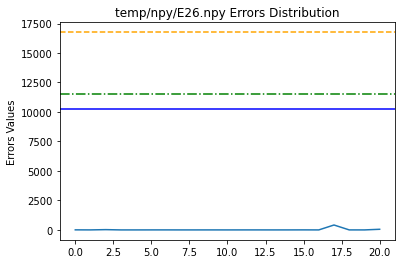

we are processing matrix: temp/npy/E27.npy
the shape of X is: (165, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]


nan nan nan


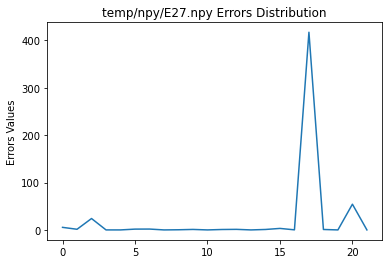

we are processing matrix: temp/npy/E28.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

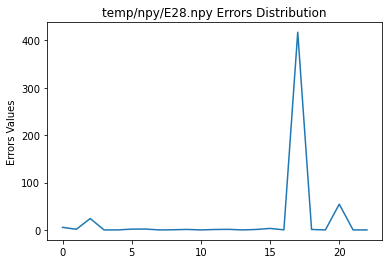

we are processing matrix: temp/npy/E29.npy
the shape of X is: (9, 3, 4)
the train x is [[[171.  36. 116. 225.]
  [171.  36. 116. 225.]
  [171.  36. 116. 225.]]

 [[171.  36. 116. 225.]
  [171.  36. 116. 225.]
  [171.  36. 116. 225.]]

 [[171.  36. 116. 225.]
  [171.  36. 116. 225.]
  [171.  36. 116. 225.]]

 [[171.  36. 116. 225.]
  [171.  36. 116. 225.]
  [171.  36. 116. 225.]]

 [[171.  36. 116. 225.]
  [171.  36. 116. 225.]
  [171.  36. 116. 225.]]] and its shape is (5, 3, 4)
Epoch 1/60
1/1 - 0s - loss: 24449.3828
Epoch 2/60
1/1 - 0s - loss: 23007.7109
Epoch 3/60
1/1 - 0s - loss: 21707.0996
Epoch 4/60
1/1 - 0s - loss: 20583.3242
Epoch 5/60
1/1 - 0s - loss: 19438.3125
Epoch 6/60
1/1 - 0s - loss: 18245.4473
Epoch 7/60
1/1 - 0s - loss: 17034.1406
Epoch 8/60
1/1 - 0s - loss: 15665.4092
Epoch 9/60
1/1 - 0s - loss: 14217.9629
Epoch 10/60
1/1 - 0s - loss: 12344.9766
Epoch 11/60
1/1 - 0s - loss: 10044.4668
Epoch 12/60
1/1 - 0s - loss: 7859.9229
Epoch 13/60
1/1 - 0s - loss: 5987.3252
Epoch 1

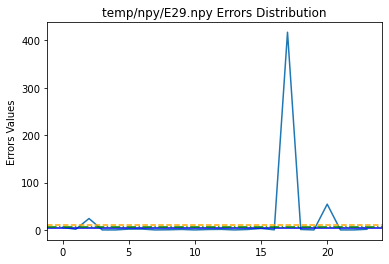

we are processing matrix: temp/npy/E3.npy
the shape of X is: (93, 3, 6)
the train x is [[[  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]]

 [[  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]]

 [[  0. 185.  14.  66.  66.  66.]
  [  0. 222.   5.  55.   5.  57.]
  [  0.  84. 146.  77.  77.  77.]]

 [[  0.  35.  58.  31.  31.  31.]
  [  0.  50.   5.   8.   5.  14.]
  [  0.   4.  12.   4.  82.  12.]]

 [[  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]
  [  0. 185.  14.  66.  66.  66.]]

 [[  0. 185.  14.  66.  66.  66.]
  [  0. 222.   5.  55.   5.  57.]
  [  0.  84. 146.  77.  77.  77.]]

 [[  0. 123.  11.  45.  45.  45.]
  [  0. 185.  14.  66.  66.  66.]
  [  0. 222.   5.  55.   5.  57.]]

 [[  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]]

 [[  0.  50.   5.   8.   5.  14.]
  [  0.   4.  12.   4.  82.  12.]
  [  0.   4. 

INFO:tensorflow:Assets written to: parameter_model\assets
the test_x is: [[[  0. 222.   5.  55.   5.  57.]
  [  0.  84. 146.  77.  77.  77.]
  [  0.  35.  58.  31.  31.  31.]]

 [[  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]]

 [[  0.   4.  41.   4.  33.  16.]
  [  0. 123.  11.  45.  45.  45.]
  [  0. 185.  14.  66.  66.  66.]]

 [[  0. 123.  11.  45.  45.  45.]
  [  0. 185.  14.  66.  66.  66.]
  [  0. 222.   5.  55.   5.  57.]]

 [[  0.  50.   5.   8.   5.  14.]
  [  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]]

 [[  0.  84. 146.  77.  77.  77.]
  [  0.  35.  58.  31.  31.  31.]
  [  0.  50.   5.   8.   5.  14.]]

 [[  0.  50.   5.   8.   5.  14.]
  [  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]]

 [[  0.  50.   5.   8.   5.  14.]
  [  0.   4.  12.   4.  82.  12.]
  [  0.   4.  41.   4.  33.  16.]]

 [[  0. 185.  14.  66.  66.  66.]
  [  0. 222.   5.  55.   5.  57.]
  [  0.  84. 146.  77.  77.

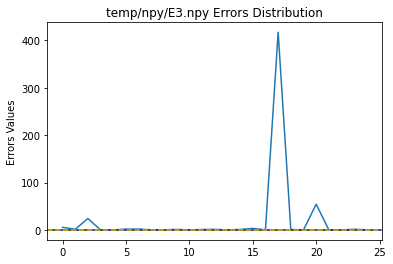

we are processing matrix: temp/npy/E30.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

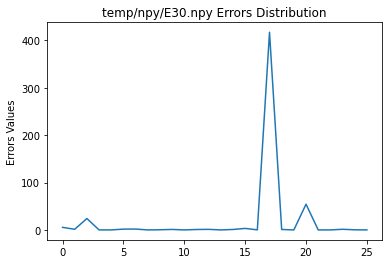

we are processing matrix: temp/npy/E31.npy
the shape of X is: (33, 3, 3)
the train x is [[[  0.   7. 258.]
  [  0.   7. 171.]
  [  0.   7. 171.]]

 [[324.   7. 151.]
  [  0.   7. 258.]
  [  0.   7. 171.]]

 [[  0.   7. 258.]
  [324.   7. 151.]
  [  0.   7. 258.]]

 [[  0.   7. 171.]
  [  0.   7. 171.]
  [324.   7. 151.]]

 [[324.   7. 151.]
  [  0.   7. 258.]
  [324.   7. 151.]]

 [[324.   7. 151.]
  [324.   7. 151.]
  [  0.   7. 258.]]

 [[  0.   7. 258.]
  [  0.   7. 171.]
  [  0.   7. 171.]]

 [[  0.   7. 258.]
  [  0.   7. 258.]
  [  0.   7. 171.]]

 [[324.   7. 151.]
  [  0.   7. 258.]
  [  0.   7. 171.]]

 [[324.   7. 151.]
  [  0.   7. 258.]
  [324.   7. 151.]]

 [[324.   7. 151.]
  [  0.   7. 171.]
  [  0.   7. 258.]]

 [[  0.   7. 171.]
  [324.   7. 151.]
  [324.   7. 151.]]

 [[  0.   7. 171.]
  [  0.   7. 258.]
  [  0.   7. 171.]]

 [[  0.   7. 171.]
  [324.   7. 151.]
  [324.   7. 151.]]

 [[  0.   7. 258.]
  [  0.   7. 171.]
  [  0.   7. 171.]]

 [[  0.   7. 258.]
  [  0. 

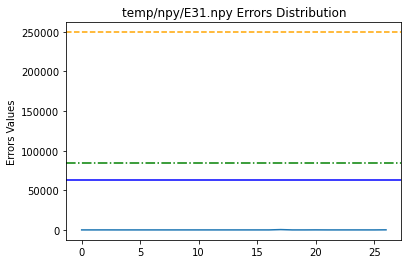

we are processing matrix: temp/npy/E32.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

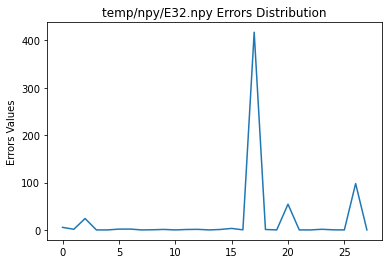

we are processing matrix: temp/npy/E33.npy
the shape of X is: (213, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]


the predicted y is: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
the d_matrix is: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

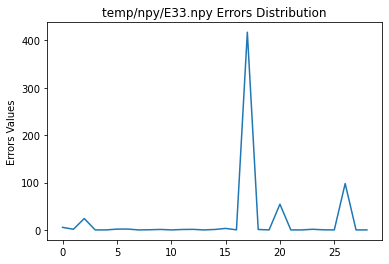

we are processing matrix: temp/npy/E34.npy
the shape of X is: (6325, 3, 5)
the train x is [[[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]

 [[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]

 [[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]

 ...

 [[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]

 [[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]

 [[600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]
  [600.  13.   1.   2.  13.]]] and its shape is (3795, 3, 5)
Epoch 1/60
119/119 - 2s - loss: 5619685.5000
Epoch 2/60
119/119 - 4s - loss: 5305905.0000
Epoch 3/60
119/119 - 2s - loss: 5354701.0000
Epoch 4/60
119/119 - 1s - loss: 5392011.5000
Epoch 5/60
119/119 - 2s - loss: 5380510.0000
Epoch 6/60
119/119 - 2s - loss: 5335724.5000
Epoch 7/60
119/119 - 3s - loss: 5331562.0000
Epoch 8/60
119/119 - 6s -

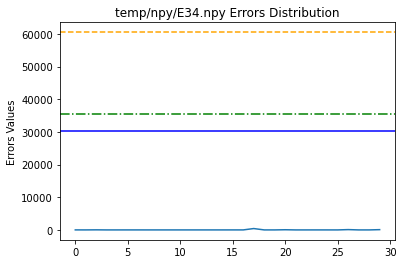

we are processing matrix: temp/npy/E35.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

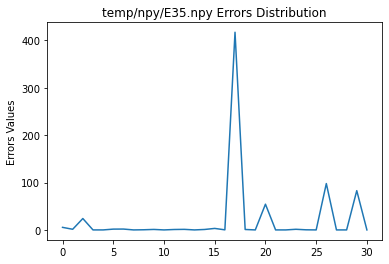

we are processing matrix: temp/npy/E36.npy
the shape of X is: (33, 3, 4)
the train x is [[[  0. 113.  11. 184.]
  [  0.  54.  14. 172.]
  [  0. 236.   9.  20.]]

 [[  0. 236.   9.  20.]
  [  0. 113.  11. 184.]
  [  0.  54.  14. 172.]]

 [[  0.  54.  14. 172.]
  [  0. 236.   9.  20.]
  [  0. 113.  11. 184.]]

 [[  0.  54.  14. 172.]
  [  0. 236.   9.  20.]
  [  0. 113.  11. 184.]]

 [[  0. 113.  11. 184.]
  [  0.  54.  14. 172.]
  [  0. 236.   9.  20.]]

 [[  0. 113.  11. 184.]
  [  0.  54.  14. 172.]
  [  0. 236.   9.  20.]]

 [[  0. 113.  11. 184.]
  [  0.  54.  14. 172.]
  [  0. 236.   9.  20.]]

 [[  0. 236.   9.  20.]
  [  0. 113.  11. 184.]
  [  0.  54.  14. 172.]]

 [[  0. 236.   9.  20.]
  [  0. 113.  11. 184.]
  [  0.  54.  14. 172.]]

 [[  0. 113.  11. 184.]
  [  0.  54.  14. 172.]
  [  0. 236.   9.  20.]]

 [[  0. 236.   9.  20.]
  [  0. 113.  11. 184.]
  [  0.  54.  14. 172.]]

 [[  0. 236.   9.  20.]
  [  0. 113.  11. 184.]
  [  0.  54.  14. 172.]]

 [[  0. 113.  11. 184.]


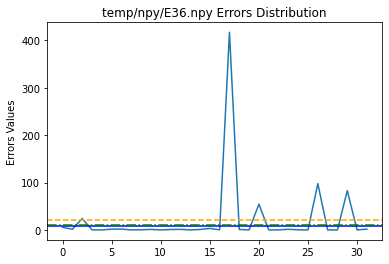

we are processing matrix: temp/npy/E37.npy
the shape of X is: (9, 3, 3)
the train x is [[[  0. 107. 220.]
  [  0. 107. 220.]
  [  0. 107. 220.]]

 [[  0. 107. 220.]
  [  0. 107. 220.]
  [  0. 107. 220.]]

 [[  0. 107. 220.]
  [  0. 107. 220.]
  [  0. 107. 220.]]

 [[  0. 107. 220.]
  [  0. 107. 220.]
  [  0. 107. 220.]]

 [[  0. 107. 220.]
  [  0. 107. 220.]
  [  0. 107. 220.]]] and its shape is (5, 3, 3)
Epoch 1/60
1/1 - 0s - loss: 19748.2578
Epoch 2/60
1/1 - 0s - loss: 18963.3887
Epoch 3/60
1/1 - 0s - loss: 18213.8711
Epoch 4/60
1/1 - 0s - loss: 17527.3262
Epoch 5/60
1/1 - 0s - loss: 16917.5059
Epoch 6/60
1/1 - 0s - loss: 16220.7998
Epoch 7/60
1/1 - 0s - loss: 15348.6846
Epoch 8/60
1/1 - 0s - loss: 14228.3721
Epoch 9/60
1/1 - 0s - loss: 12858.8467
Epoch 10/60
1/1 - 0s - loss: 11524.0811
Epoch 11/60
1/1 - 0s - loss: 10013.0596
Epoch 12/60
1/1 - 0s - loss: 8289.2607
Epoch 13/60
1/1 - 0s - loss: 6525.4565
Epoch 14/60
1/1 - 0s - loss: 4194.9102
Epoch 15/60
1/1 - 0s - loss: 2081.2000
Epoc

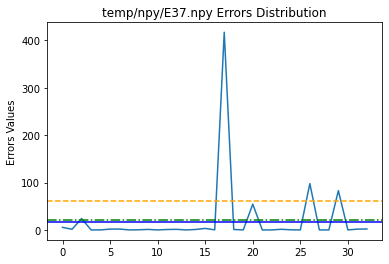

we are processing matrix: temp/npy/E38.npy
the shape of X is: (21, 3, 2)
the train x is [[[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[ 17. 247.]
  [  0. 144.]
  [ 17. 247.]]

 [[ 17. 247.]
  [  0. 144.]
  [ 17. 247.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[ 17. 247.]
  [  0. 144.]
  [ 17. 247.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[ 17. 247.]
  [  0. 144.]
  [ 17. 247.]]

 [[  0. 144.]
  [ 17. 247.]
  [  0. 144.]]

 [[ 17. 247.]
  [  0. 144.]
  [ 17. 247.]]] and its shape is (12, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 21282.2031
Epoch 2/60
1/1 - 0s - loss: 20171.8027
Epoch 3/60
1/1 - 0s - loss: 19074.5996
Epoch 4/60
1/1 - 0s - loss: 18062.9844
Epoch 5/60
1/1 - 0s - loss: 16974.9062
Epoch 6/60
1/1 - 0s - loss: 15879.8916
Epoch 7/60
1/1 - 0s - loss: 14782.4111
Epoch 8/60
1/1 - 0s - loss: 13579.9521
Epoch 9/60
1/1 - 0s - loss: 12207.2822
Epoch

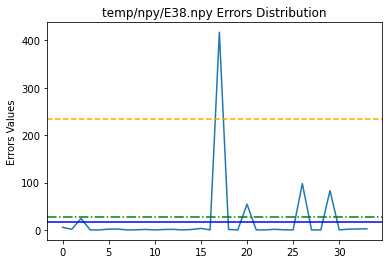

we are processing matrix: temp/npy/E39.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

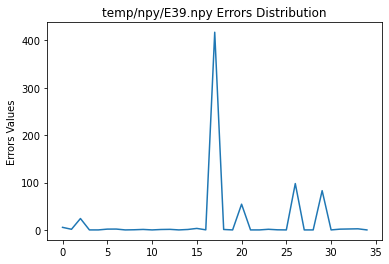

we are processing matrix: temp/npy/E4.npy
the shape of X is: (165, 3, 4)
the train x is [[[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]

 [[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]

 [[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]

 ...

 [[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]

 [[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]

 [[  0.  67. 241.  67.]
  [  0.  67. 241.  67.]
  [  0.  67. 241.  67.]]] and its shape is (99, 3, 4)
Epoch 1/60
4/4 - 0s - loss: 16509.6035
Epoch 2/60
4/4 - 0s - loss: 13295.4941
Epoch 3/60
4/4 - 0s - loss: 10319.8350
Epoch 4/60
4/4 - 0s - loss: 6082.2397
Epoch 5/60
4/4 - 0s - loss: 1646.1570
Epoch 6/60
4/4 - 0s - loss: 456.6109
Epoch 7/60
4/4 - 0s - loss: 486.5720
Epoch 8/60
4/4 - 0s - loss: 150.6976
Epoch 9/60
4/4 - 0s - loss: 79.2610
Epoch 10/60
4/4 - 0s - loss: 87.5457
Epoch 11/60
4/4 - 0s - loss: 40.9979
Epoch 12/60
4/4 - 0s

the predicted y is: [[-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.4100029e+02  6.7000076e+01]
 [-3.9705075e-05  6.6999580e+01  2.

2.5189755380178126e-07 3.050271853270355e-07 5.944588109926425e-07


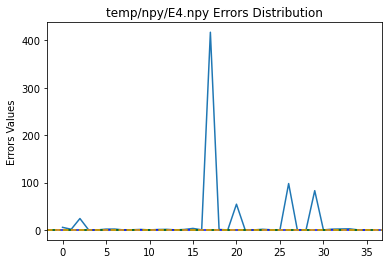

we are processing matrix: temp/npy/E40.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

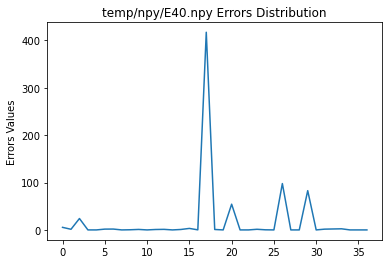

we are processing matrix: temp/npy/E41.npy
the shape of X is: (81, 3, 7)
the train x is [[[350.  18. 230. ... 232. 233.  18.]
  [291.   4. 104. ...   4. 104. 105.]
  [354.   4. 104. ...   4. 104. 105.]]

 [[350.  18. 230. ... 232. 233.  18.]
  [291.   4. 104. ...   4. 104. 105.]
  [354.   4. 104. ...   4. 104. 105.]]

 [[108.   4. 104. ...   4. 104. 105.]
  [ 97.   4. 104. ...   4. 104. 105.]
  [ 88.   4. 104. ...   4. 104. 105.]]

 ...

 [[ 88.   4. 104. ...   4. 104. 105.]
  [ 79.   4. 104. ...   4. 104. 105.]
  [350.  18. 230. ... 232. 233.  18.]]

 [[354.   4. 104. ...   4. 104. 105.]
  [108.   4. 104. ...   4. 104. 105.]
  [108.   4. 104. ...   4. 104. 105.]]

 [[ 79.   4. 104. ...   4. 104. 105.]
  [350.  18. 230. ... 232. 233.  18.]
  [291.   4. 104. ...   4. 104. 105.]]] and its shape is (48, 3, 7)
Epoch 1/60
2/2 - 0s - loss: 18073.2500
Epoch 2/60
2/2 - 0s - loss: 16701.0176
Epoch 3/60
2/2 - 0s - loss: 15974.6982
Epoch 4/60
2/2 - 0s - loss: 15081.3252
Epoch 5/60
2/2 - 0s - loss

the predicted y is: [[165.0767     14.360973  134.55418   159.68073    74.83561   141.36955
   83.7881   ]
 [353.72678     2.59224   103.35363   111.28475     7.128603   98.058846
  104.965195 ]
 [ 93.84944     7.191509  102.76042   108.3691      2.05291   100.72738
  106.91967  ]
 [149.52669    21.096827  117.03658   146.8074     61.12562   128.58015
   86.67159  ]
 [287.32138     1.5260122 131.41457   122.50915    13.969374  115.35402
   99.72913  ]
 [103.36837     3.7642972 100.93473   107.49855     4.2118835 101.72814
  103.99474  ]
 [358.19217     2.2329285 109.28663   113.12379     3.2342093 103.90391
  106.53119  ]
 [353.72678     2.59224   103.35363   111.28475     7.128603   98.058846
  104.965195 ]
 [165.0767     14.360973  134.55418   159.68073    74.83561   141.36955
   83.7881   ]
 [287.32138     1.5260122 131.41457   122.50915    13.969374  115.35402
   99.72913  ]
 [165.0767     14.360973  134.55418   159.68073    74.83561   141.36955
   83.7881   ]
 [165.0767     14.360

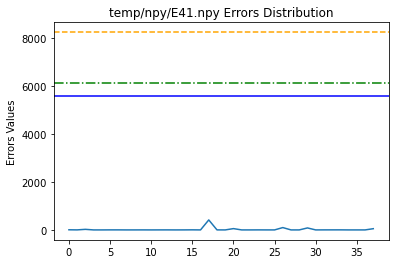

we are processing matrix: temp/npy/E42.npy
the shape of X is: (9, 3, 2)
the train x is [[[3.16833e+05 1.20000e+02]
  [2.20540e+04 1.20000e+02]
  [3.16833e+05 1.20000e+02]]

 [[3.16833e+05 1.20000e+02]
  [3.16833e+05 1.20000e+02]
  [3.16833e+05 1.20000e+02]]

 [[3.16233e+05 1.20000e+02]
  [3.16233e+05 1.20000e+02]
  [2.24080e+04 1.20000e+02]]

 [[0.00000e+00 1.20000e+02]
  [2.14160e+04 1.20000e+02]
  [3.16233e+05 1.20000e+02]]

 [[2.24080e+04 1.20000e+02]
  [3.16833e+05 1.20000e+02]
  [3.16833e+05 1.20000e+02]]] and its shape is (5, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 40851677184.0000
Epoch 2/60
1/1 - 0s - loss: 40723554304.0000
Epoch 3/60
1/1 - 0s - loss: 40264134656.0000
Epoch 4/60
1/1 - 0s - loss: 40011038720.0000
Epoch 5/60
1/1 - 0s - loss: 39645827072.0000
Epoch 6/60
1/1 - 0s - loss: 39529091072.0000
Epoch 7/60
1/1 - 0s - loss: 38928371712.0000
Epoch 8/60
1/1 - 0s - loss: 38591643648.0000
Epoch 9/60
1/1 - 0s - loss: 38337228800.0000
Epoch 10/60
1/1 - 0s - loss: 37990760448.0000
Epoch

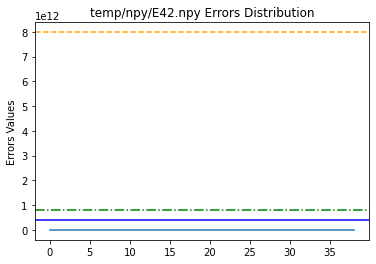

we are processing matrix: temp/npy/E43.npy
the shape of X is: (21, 3, 2)
the train x is [[[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 194.]
  [  0. 250.]
  [  0. 194.]]

 [[  0. 194.]
  [  0. 250.]
  [  0. 194.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 194.]
  [  0. 250.]
  [  0. 194.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 194.]
  [  0. 250.]
  [  0. 194.]]

 [[  0. 250.]
  [  0. 194.]
  [  0. 250.]]

 [[  0. 194.]
  [  0. 250.]
  [  0. 194.]]] and its shape is (12, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 25138.7285
Epoch 2/60
1/1 - 0s - loss: 24205.2285
Epoch 3/60
1/1 - 0s - loss: 23352.6895
Epoch 4/60
1/1 - 0s - loss: 22579.2168
Epoch 5/60
1/1 - 0s - loss: 21852.9062
Epoch 6/60
1/1 - 0s - loss: 21156.7441
Epoch 7/60
1/1 - 0s - loss: 20468.8418
Epoch 8/60
1/1 - 0s - loss: 19752.3027
Epoch 9/60
1/1 - 0s - loss: 18960.3262
Epoch

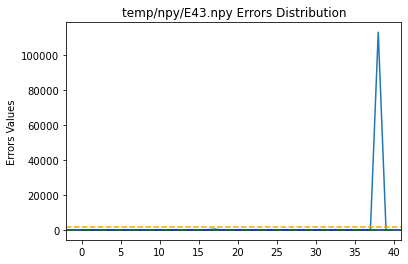

we are processing matrix: temp/npy/E44.npy
the shape of X is: (21, 3, 3)
the train x is [[[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 235. 167.]
  [  0. 190.  26.]
  [  0. 235. 167.]]

 [[  0. 235. 167.]
  [  0. 190.  26.]
  [  0. 235. 167.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 235. 167.]
  [  0. 190.  26.]
  [  0. 235. 167.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 235. 167.]
  [  0. 190.  26.]
  [  0. 235. 167.]]

 [[  0. 190.  26.]
  [  0. 235. 167.]
  [  0. 190.  26.]]

 [[  0. 235. 167.]
  [  0. 190.  26.]
  [  0. 235. 167.]]] and its shape is (12, 3, 3)
Epoch 1/60
1/1 - 0s - loss: 21413.9883
Epoch 2/60
1/1 - 0s - loss: 20855.9902
Epoch 3/60
1/1 - 0s - loss: 20332.8711
Epoch 4/60
1/1 - 0s - loss: 19797.0625
Epoch 5/60
1/1 - 0s 

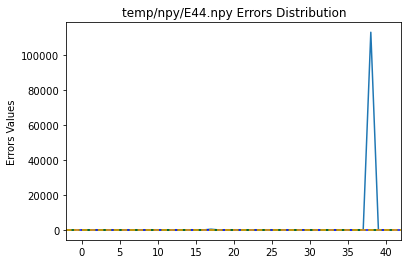

we are processing matrix: temp/npy/E45.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

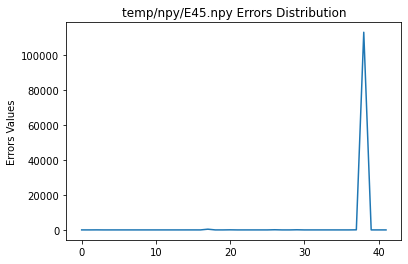

we are processing matrix: temp/npy/E46.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

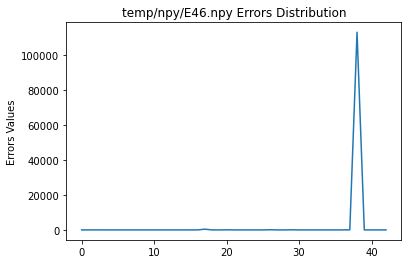

we are processing matrix: temp/npy/E47.npy
the shape of X is: (177, 3, 2)
the train x is [[[  0.  94.]
  [  0. 205.]
  [  0. 259.]]

 [[  0.  83.]
  [  0. 147.]
  [  0.  40.]]

 [[  0.  43.]
  [  0. 200.]
  [  0. 159.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0.  83.]
  [  0. 147.]
  [  0.  40.]]

 [[  0. 141.]
  [  0.  94.]
  [  0. 205.]]

 [[  0. 259.]
  [  0. 149.]
  [  0.  43.]]

 [[  0. 141.]
  [  0.  94.]
  [  0. 205.]]

 [[  0. 141.]
  [  0.  94.]
  [  0. 205.]]

 [[  0. 200.]
  [  0. 159.]
  [  0.  83.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 141.]
  [  0.  94.]
  [  0. 205.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 147.]
  [  0.  40.]
  [  0.  77.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 242.]
  [  0. 243.]
  [  0. 251.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 149.]
  [  0.  43.]
  [  0. 200.]]

 [[  0. 251.]
  [  0. 141.]
  [  0.  94.]]

 [[  0. 243.]
  [  0. 251.]
  [

the predicted y is: [[-1.6308361e-01  1.5874599e+02]
 [-1.7068297e-01  2.4249838e+02]
 [-1.6728741e-01  9.3966324e+01]
 [-2.6783528e-02  8.2623344e+01]
 [-1.6728741e-01  9.3966324e+01]
 [-6.9171488e-02  2.5063806e+02]
 [-2.1825701e-01  4.2708881e+01]
 [-1.6308361e-01  1.5874599e+02]
 [-6.9171488e-02  2.5063806e+02]
 [-1.7068297e-01  2.4249838e+02]
 [-1.7068297e-01  2.4249838e+02]
 [-2.6783528e-02  8.2623344e+01]
 [-1.7560726e-01  2.5855978e+02]
 [-2.5950009e-01  1.9973996e+02]
 [-8.5321087e-03  1.4065245e+02]
 [-1.7560726e-01  2.5855978e+02]
 [-1.6728741e-01  9.3966324e+01]
 [-1.6728741e-01  9.3966324e+01]
 [-6.9171488e-02  2.5063806e+02]
 [-7.0708334e-02  1.4866914e+02]
 [-7.0708334e-02  1.4866914e+02]
 [-2.1825701e-01  4.2708881e+01]
 [-2.3573834e-01  2.0493452e+02]
 [-1.1097199e-01  2.4186430e+02]
 [-1.7068297e-01  2.4249838e+02]
 [-7.0708334e-02  1.4866914e+02]
 [-7.0708334e-02  1.4866914e+02]
 [-2.1618801e-01  1.4676990e+02]
 [-2.1825701e-01  4.2708881e+01]
 [ 4.1583478e-02  7.671

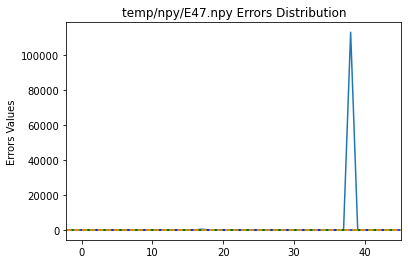

we are processing matrix: temp/npy/E48.npy
the shape of X is: (9, 3, 2)
the train x is [[[  0. 120.]
  [  0. 120.]
  [  0. 120.]]

 [[  0. 120.]
  [  0. 120.]
  [  0. 120.]]

 [[  0. 120.]
  [  0. 120.]
  [  0. 120.]]

 [[  0. 120.]
  [  0. 120.]
  [  0. 120.]]

 [[  0. 120.]
  [  0. 120.]
  [  0. 120.]]] and its shape is (5, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 7056.7954
Epoch 2/60
1/1 - 0s - loss: 6762.2822
Epoch 3/60
1/1 - 0s - loss: 6446.8828
Epoch 4/60
1/1 - 0s - loss: 6109.3037
Epoch 5/60
1/1 - 0s - loss: 5764.3633
Epoch 6/60
1/1 - 0s - loss: 5428.2051
Epoch 7/60
1/1 - 0s - loss: 5080.7812
Epoch 8/60
1/1 - 0s - loss: 4712.4873
Epoch 9/60
1/1 - 0s - loss: 4320.0908
Epoch 10/60
1/1 - 0s - loss: 3892.2656
Epoch 11/60
1/1 - 0s - loss: 3417.8960
Epoch 12/60
1/1 - 0s - loss: 2886.2285
Epoch 13/60
1/1 - 0s - loss: 2292.5110
Epoch 14/60
1/1 - 0s - loss: 1655.3219
Epoch 15/60
1/1 - 0s - loss: 1023.8844
Epoch 16/60
1/1 - 0s - loss: 494.9708
Epoch 17/60
1/1 - 0s - loss: 159.6777
Epoch 18/60
1/

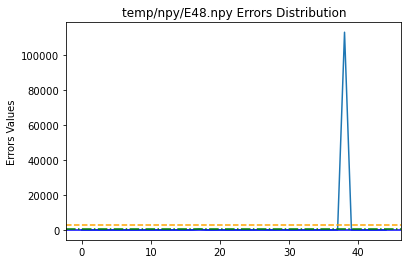

we are processing matrix: temp/npy/E49.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

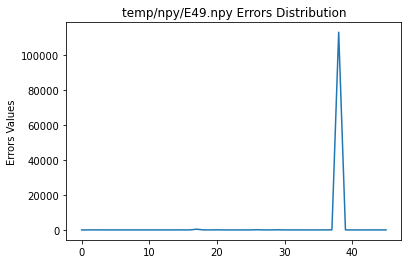

we are processing matrix: temp/npy/E5.npy
the shape of X is: (9, 3, 2)
the train x is [[[25.  7.]
  [25.  7.]
  [25.  7.]]

 [[25.  7.]
  [25.  7.]
  [25.  7.]]

 [[25.  7.]
  [25.  7.]
  [25.  7.]]

 [[25.  7.]
  [25.  7.]
  [25.  7.]]

 [[25.  7.]
  [25.  7.]
  [25.  7.]]] and its shape is (5, 3, 2)
Epoch 1/60
1/1 - 0s - loss: 328.9224
Epoch 2/60
1/1 - 0s - loss: 318.3780
Epoch 3/60
1/1 - 0s - loss: 307.1914
Epoch 4/60
1/1 - 0s - loss: 294.5225
Epoch 5/60
1/1 - 0s - loss: 279.8814
Epoch 6/60
1/1 - 0s - loss: 262.2018
Epoch 7/60
1/1 - 0s - loss: 240.7755
Epoch 8/60
1/1 - 0s - loss: 214.6868
Epoch 9/60
1/1 - 0s - loss: 183.3183
Epoch 10/60
1/1 - 0s - loss: 146.7068
Epoch 11/60
1/1 - 0s - loss: 106.5011
Epoch 12/60
1/1 - 0s - loss: 66.3558
Epoch 13/60
1/1 - 0s - loss: 33.5479
Epoch 14/60
1/1 - 0s - loss: 17.6354
Epoch 15/60
1/1 - 0s - loss: 24.2502
Epoch 16/60
1/1 - 0s - loss: 40.1530
Epoch 17/60
1/1 - 0s - loss: 45.5382
Epoch 18/60
1/1 - 0s - loss: 37.5292
Epoch 19/60
1/1 - 0s - loss: 

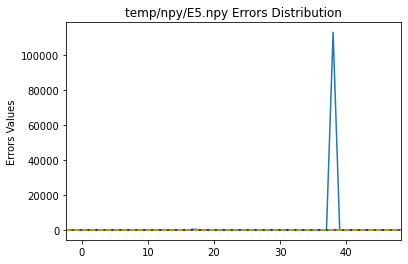

we are processing matrix: temp/npy/E50.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s

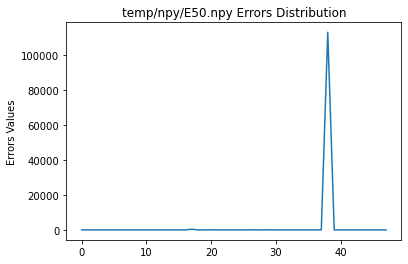

we are processing matrix: temp/npy/E51.npy
the shape of X is: (93, 3, 5)
the train x is [[[  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]]

 [[  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]]

 [[  0.   4. 181.  85. 117.]
  [  0.   4. 115. 215. 117.]
  [  0.   4. 238. 215. 117.]]

 [[  0.   4. 126.  47. 117.]
  [  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]]

 [[  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]
  [  0.   4. 181.  85. 117.]]

 [[  0.   4. 181.  85. 117.]
  [  0.   4. 115. 215. 117.]
  [  0.   4. 238. 215. 117.]]

 [[  0.   4. 209. 215. 117.]
  [  0.   4. 181.  85. 117.]
  [  0.   4. 115. 215. 117.]]

 [[  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]]

 [[  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]]

 [[  0.   4. 126.  47. 117.]
  [  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]]

 [[  0.   4. 238. 215.

the test_x is: [[[  0.   4. 115. 215. 117.]
  [  0.   4. 238. 215. 117.]
  [  0.   4. 126.  47. 117.]]

 [[  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]]

 [[  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]
  [  0.   4. 181.  85. 117.]]

 [[  0.   4. 209. 215. 117.]
  [  0.   4. 181.  85. 117.]
  [  0.   4. 115. 215. 117.]]

 [[  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]]

 [[  0.   4. 238. 215. 117.]
  [  0.   4. 126.  47. 117.]
  [  0.   4.  29.  47. 117.]]

 [[  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]]

 [[  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]]

 [[  0.   4. 181.  85. 117.]
  [  0.   4. 115. 215. 117.]
  [  0.   4. 238. 215. 117.]]

 [[  0.   4.  29.  47. 117.]
  [  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]]

 [[  0.   4. 183.  85. 117.]
  [  0.   4. 111.  47. 117.]
  [  0.   4. 209. 215. 117.]]

 [[  0

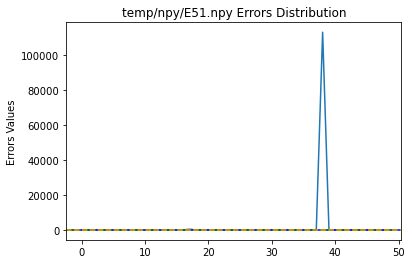

we are processing matrix: temp/npy/E6.npy
the shape of X is: (753, 3, 4)
the train x is [[[  0.   4. 183.  62.]
  [  0.   4. 111.  38.]
  [  0.   4. 115.  40.]]

 [[  0. 224. 112. 112.]
  [  0. 146.  73.  73.]
  [  0.  58.  29.  29.]]

 [[  0.   4. 104. 105.]
  [  0.   4. 104. 105.]
  [  0.  78.  39.  39.]]

 ...

 [[  0. 106.  53.  53.]
  [  0.   9.   4.   4.]
  [  1.  11.   6.   6.]]

 [[  0.   4. 181.  62.]
  [  0.  18.   9.   9.]
  [  0.   4. 104. 105.]]

 [[  0.   4. 104. 105.]
  [  0.   4. 104. 105.]
  [  0.   4. 104. 105.]]] and its shape is (451, 3, 4)
Epoch 1/60
15/15 - 0s - loss: 4679.9395
Epoch 2/60
15/15 - 0s - loss: 2713.3242
Epoch 3/60
15/15 - 0s - loss: 2222.3999
Epoch 4/60
15/15 - 0s - loss: 1829.0536
Epoch 5/60
15/15 - 0s - loss: 1349.4460
Epoch 6/60
15/15 - 0s - loss: 1082.8677
Epoch 7/60
15/15 - 0s - loss: 885.5325
Epoch 8/60
15/15 - 0s - loss: 645.6733
Epoch 9/60
15/15 - 0s - loss: 599.0379
Epoch 10/60
15/15 - 0s - loss: 562.7822
Epoch 11/60
15/15 - 0s - loss: 410.8

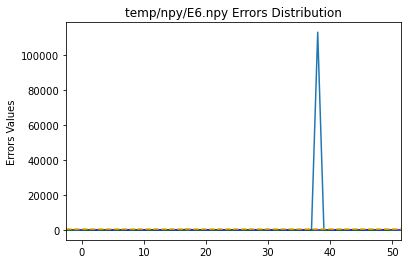

we are processing matrix: temp/npy/E7.npy
the shape of X is: (201, 3, 2)
the train x is [[[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 186.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [ 

INFO:tensorflow:Assets written to: parameter_model\assets
the test_x is: [[[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 186.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 186.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 186.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[  0.  56.]
  [  0. 197.]
  [  0.  56.]]

 [[  0. 197.]
  [  0.  56.]
  [  0. 197.]]

 [[

16965.124507162116 33410.48515958727 329380.7211693309


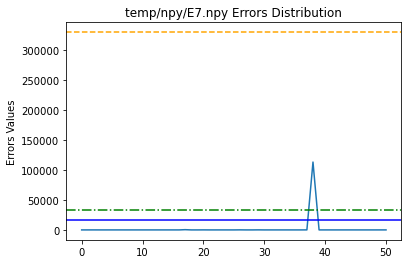

we are processing matrix: temp/npy/E8.npy
the shape of X is: (33, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (19, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 -

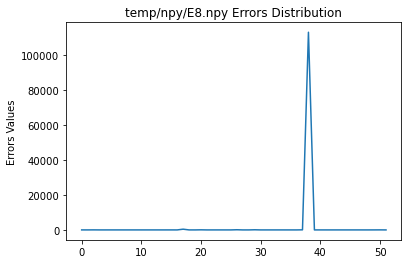

we are processing matrix: temp/npy/E9.npy
the shape of X is: (9, 3, 1)
the train x is [[[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]]] and its shape is (5, 3, 1)
Epoch 1/60
1/1 - 0s - loss: 0.0000e+00
Epoch 2/60
1/1 - 0s - loss: 0.0000e+00
Epoch 3/60
1/1 - 0s - loss: 0.0000e+00
Epoch 4/60
1/1 - 0s - loss: 0.0000e+00
Epoch 5/60
1/1 - 0s - loss: 0.0000e+00
Epoch 6/60
1/1 - 0s - loss: 0.0000e+00
Epoch 7/60
1/1 - 0s - loss: 0.0000e+00
Epoch 8/60
1/1 - 0s - loss: 0.0000e+00
Epoch 9/60
1/1 - 0s - loss: 0.0000e+00
Epoch 10/60
1/1 - 0s - loss: 0.0000e+00
Epoch 11/60
1/1 - 0s - loss: 0.0000e+00
Epoch 12/60
1/1 - 0s - loss: 0.0000e+00
Epoch 13/60
1/1 - 0s - loss: 0.0000e+00
Epoch 14/60
1/1 - 0s - loss: 0.0000e+00
Epoch 15/60
1/1 - 0s - loss: 0.0000e+00
Epoch 16/60
1/1 - 0s - loss: 0.0000e+00
Epoch 17/60
1/1 - 0s - loss: 0.0000e+00
Epoch 18/60
1/1 - 0s - loss: 0.0000e+00
Epoch 19/60
1/1 - 0s - loss: 0.0000e+00
Epoch 20/60
1/1 - 0s 

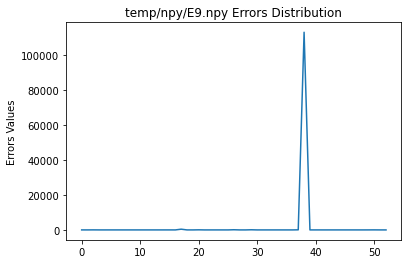

CPU times: total: 21h 16min 13s
Wall time: 6h 9min 33s


['temp/result/fp_logs.csv']

In [8]:
    %%time

    # identify whether result file has been generated before
    for file in filenames:
        if os.path.isfile(file + '_rmses.pkl'):
            rmses = joblib.load(file + '_rmses.pkl')

        else:
            # looping read single file
            print("we are processing matrix:", file)
            matrix = np.load(file)
            # set n_steps_in and n_steps_out depending on the sequence length of matrix
            # we set the test_size=0.4, the length of matrix should be at least 8
            # Here, I will change the length of history to see the performance
            if matrix.shape[0] >= 8:
                n_steps = 3
                X, Y = training_data_generate(matrix, n_steps)
                train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.4, random_state=seed)

            elif matrix.shape[0] >= 2:
                n_steps = 1
                X, Y = training_data_generate(matrix, n_steps)
                # test_x and
                train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=seed)
            else:
                continue
            # get the model
            model = LSTM_model(train_x, train_y)
            print("the test_x is:", test_x)
            # make a prediction
            yhat = model.predict(test_x)
            # delete the time step element
            print("the predicted y is:", yhat)

            rmse, means = mean_squared_error_modified(test_y, yhat)
            # rmse, meams = mean_squared_error(test_y, yhat)
            rmse = sqrt(rmse)
            print('Test RMSE: %.3f' % rmse)
            # use the mean square error to compare the difference between predicted y and validation y
            # the error follows the Gaussian distribution ---- normal, otherwise abnormal
            rmses.append(rmse)
            # save the result
            rmses_dict[file] = rmse
            
            # save the results to files
            joblib.dump(rmses, file + '_rmses.pkl')
            joblib.dump(rmses_dict, file + '_rmses_dict.pkl')

        # ===== part to predict the anomaly logs ====


        file_number = re.findall('\d+', file)
        threshold1, threshold2, threshold3, suspicious_logs, \
            fp_logs = anomaly_report(means,file_number)
 
        # part to print the picture of means with bar chart
        # create the x axis labels for plot
        x_list = []
        for i in range(len(rmses)):
            x_list.append(i)
        if len(x_list)<=1:
            pass
        else:
            # part to print the picture of means with line chart
            if len(suspicious_logs)==0:
                plt.plot(x_list, rmses)
            else:
                plt.plot(x_list, rmses, 'r')
            # add the threshold lines with percentage
            print(threshold1,threshold2,threshold3)
            plt.axhline(y=threshold1, linestyle = "-", label = '98%', color='blue')
            plt.axhline(y=threshold2, linestyle = "-.", label = '99%', color='green')
            plt.axhline(y=threshold3, linestyle = "--", label = '99.9%', color='orange')
            plt.ylabel("Errors Values")

            plt.title(file_number[0] + ' ' + 'Errors Distribution')
            plt.title(file + ' ' + 'Errors Distribution')
            plt.show()
        # generate the dict about anomaly and false positive logs
        if len(suspicious_logs) == 0 & len(fp_logs) == 0:
            pass
        else:
            suspicious_anomaly_dict[file_number[0]] = suspicious_logs
            fp_logs_dict[file_number[0]] = fp_logs
    # save the result
    joblib.dump(suspicious_anomaly_dict,'temp/result/suspecious_logs_param.csv')
    joblib.dump(fp_logs_dict, 'temp/result/fp_logs.csv')

### Visualize Vector Time Gap


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


def visualize_value(filename):
    '''
    :param filename: the example is like '../data/System_logs/log_value_vector.csv'
    :return:
    '''
    fd = pd.read_csv(filename)
    parameter_value_vectors = []
    # get the parameter_value_vector line
    parameter_value_vectors = fd['parameter value vector']
    time_gap_lists = []
    # copy the orginal data used for analysis
    time_gap_lists = parameter_value_vectors.copy()
    time_gap_lists = [var.split(',')[0] for var in time_gap_lists]
    # transfer the str data into int dtype
    replace_pattern = { "[": "", "]": ""}
    # define the function to replace multiple values
    def replace_all(text, dic):
        for i, j in dic.items():
            text = text.replace(i, j)
        return text
    # replace the '[' and ']' in a string
    time_gap_lists = [int(replace_all(var, replace_pattern)) for var in time_gap_lists]
    plt.hist(time_gap_lists,bins=100)
    plt.xlabel('Time Gap')
    plt.ylabel('Occurrence')
    plt.title('Normal RtpDump Time Anomaly Detection')

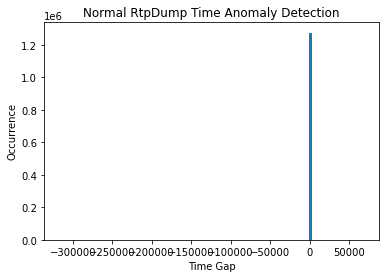

In [6]:
visualize_value('data/RtpDump.log_value_vector.csv')